#1. Introducción

El diagnóstico temprano de cáncer de mama es fundamental para mejorar la supervivencia de las pacientes. En este proyecto utilizamos el Breast Cancer Wisconsin Dataset, un conjunto de datos biomédicos ampliamente utilizado en investigación, para construir un modelo de clasificación binaria mediante regresión logística.

El objetivo es distinguir entre:

1 = Tumor Maligno (clase crítica)

0 = Tumor Benigno

En un contexto médico, los errores tienen diferente gravedad:

Un falso negativo (maligno → benigno) es especialmente peligroso.

Los modelos deben priorizar alta sensibilidad (recall) para la clase maligna.

Interpretar resultados mediante métricas clínicas como sensibilidad, especificidad y AUC

Comparar modelos usando buenas prácticas de la industria

In [2]:

# ==========================
# 1. Importar librerías

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos para gráficas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ==========================
# 2. Cargar el dataset
# ==========================
data = load_breast_cancer()

# Crear DataFrame
datos = pd.DataFrame(data.data, columns=data.feature_names)

# En el dataset original tenemos como variable objetivo el 0 (0=maligno, 1=benigno)
# Nosotros vamos a invertirla: ahora 1 será maligno (clase crítica)
y_original = data.target

# Crear variable modificada
# data.target: 0 = maligno → queremos 1
# data.target: 1 = benigno → queremos 0
datos["diagnóstico"] = np.where(data.target == 0, 1, 0)

datos.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnóstico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#Exploración inicial (EDA)

Aquí analizamos:

tipos de datos

nulos

estadísticas

distribución de clases

gráficas

# Información general del dataset

In [3]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Estadíticas descriptivas

In [4]:
datos.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnóstico
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#Distribución de la clase objetivo (YA INVERTIDA)

In [5]:
datos["diagnóstico"].value_counts()


,count
diagnóstico,
0,357
1,212


In [6]:
datos["diagnóstico"].value_counts(normalize=True)


,proportion
diagnóstico,
0,0.627417
1,0.372583


# Distribución de clases

Esto es muy importante en datos médicos y en general saber la forma de
nuestras distribuciones.

/tmp/ipython-input-147834901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


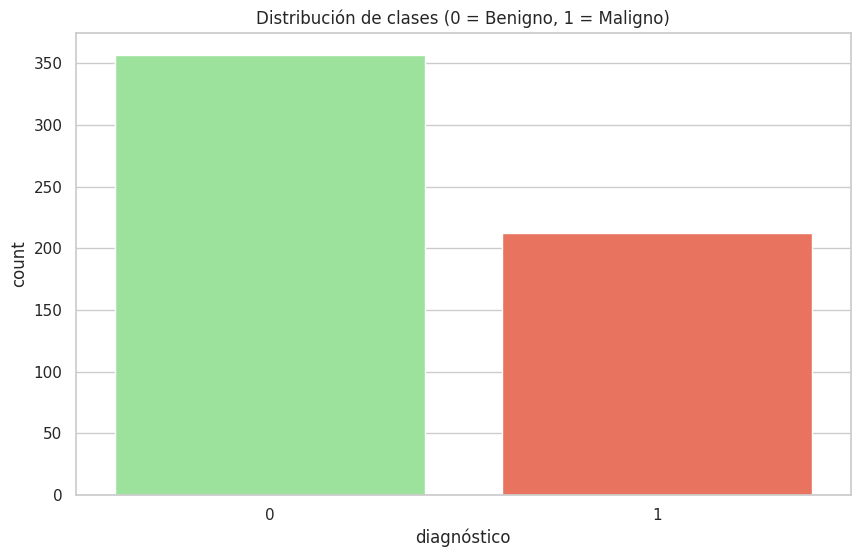

In [8]:
sns.countplot(
    data=datos,
    x="diagnóstico",
    palette=["lightgreen", "tomato"] # verde = benigno, rojo = maligno
)
plt.title("Distribución de clases (0 = Benigno, 1 = Maligno)")
plt.show()


#Histogramas de las variables

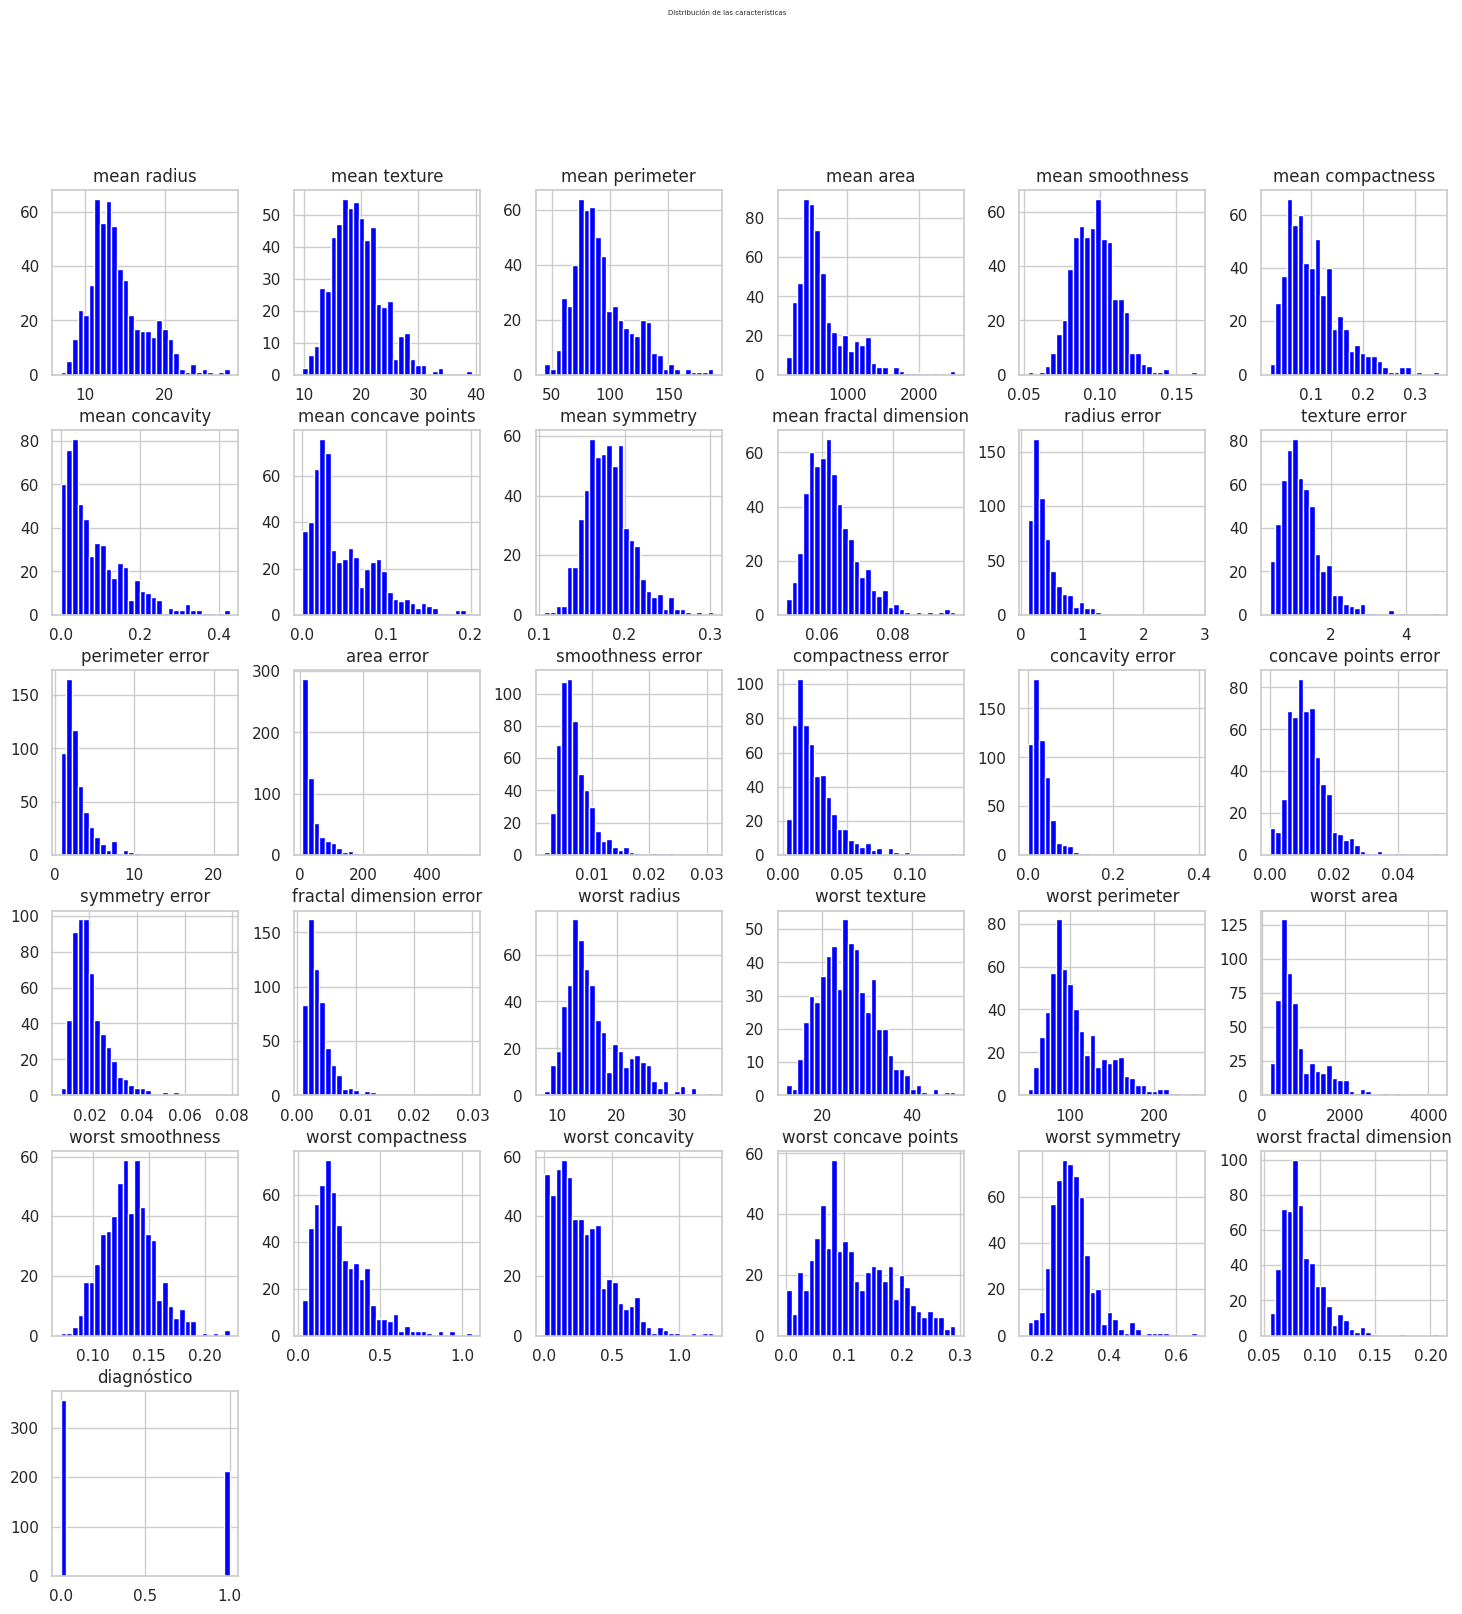

In [13]:
datos.hist(figsize=(18,18), bins=30, color='blue')
plt.suptitle("Distribución de las características", fontsize=5)
plt.show()


#Mapa de calor de correlaciones
Esto nos ayuda a ver la multiolinealidad entre las variables del dataset

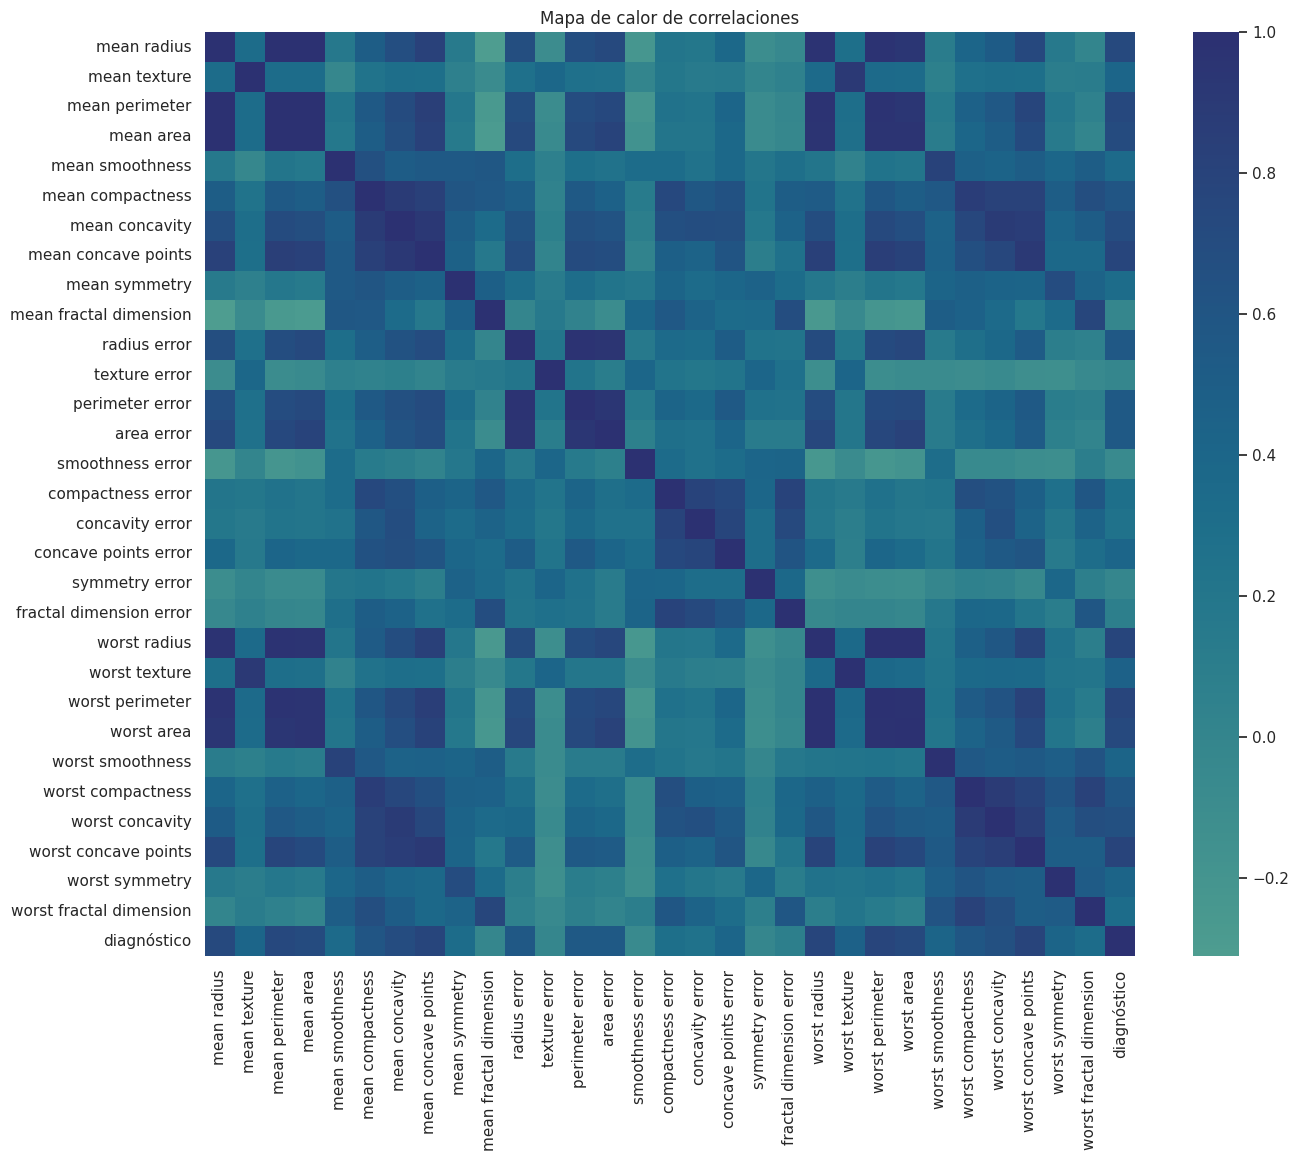

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(datos.corr(), cmap="crest", center=0)
plt.title("Mapa de calor de correlaciones")
plt.show()


# Segmentación de variables
variables predictoras (X) y objetivo (y)

In [16]:
X = datos.drop("diagnóstico", axis=1)
y = datos["diagnóstico"]


#División Train/Test (stratify para mantener proporciones)
Antes de realizar cualquier otro movimiento, separamos el test set y no lo tocamos hasta terminar el análisis


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,        # 80% train, 20% test
    stratify=y,            # mantiene proporciones de maligno/benigno
    random_state=42
)


# Ahora creamos un Pipeline con escalamiento y logística

Esto evita fugas de información (“data leakage”)
y asegura que el escalador sea ajustado solo con train.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

modelo_logistico = Pipeline(steps=[
    ("escalador", StandardScaler()),
    ("logistica", LogisticRegression(max_iter=500))
])


# Entrenemos el modelo...

In [19]:
modelo_logistico.fit(X_train, y_train)


Pipeline(steps=[('escalador', StandardScaler()),
                ('logistica', LogisticRegression(max_iter=500))])

#Evaluación completa del modelo

Métricas importantes en medicina:

accuracy

precision

recall (sensibilidad) → la más crítica

f1-score

matriz de confusión

ROC-AUC

In [27]:
from numpy.random import f
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo_logistico.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy: {accuracy} ,\nprecision: {precision}, \nrecall: {recall}, \nf1: {f1}")

accuracy: 0.9649122807017544 ,
precision: 0.975, 
recall: 0.9285714285714286, 
f1: 0.9512195121951219


# Interpretación por métrica
✅ 1. Accuracy = 0.9649 (96.5%)

El modelo clasifica correctamente ~96.5% de TODOS los casos (malignos + benignos).

Pero en medicina, accuracy sola NO es suficiente → podemos estar clasificando bien benignos y fallar en malignos. Por eso vamos a las otras métricas.
2. Precision = 0.975 (97.5%)

Interpretación:
De todos los tumores que el modelo dijo que eran malignos (clase 1), el 97.5% realmente lo eran.

Traducción médica:
El modelo casi nunca da falsos positivos.
➡️ No estamos alarmando a pacientes sanos innecesariamente.

Muy bueno, pero no es la métrica más importante en cáncer.

3. Recall = 0.9286 (92.9%)

Esta es la métrica más crítica.

Interpretación:
El modelo detecta correctamente el 92.9% de los tumores malignos reales.

En medicina (detección de cáncer):

Recall alto = Excelente

Recall bajo = Peligroso
(significa que dejaríamos pasar tumores reales como si fueran benignos)

Tu modelo está por arriba del 90%, lo cual es muy bueno para un baseline.

4. F1-Score = 0.9512 (95.1%)

Esta métrica balancea precisión y recall.

Interpretación:
El modelo mantiene un equilibrio muy bueno entre:

Detectar correctamente tumores malignos

No etiquetar erróneamente muchos benignos como malignos

#Matriz de confusión

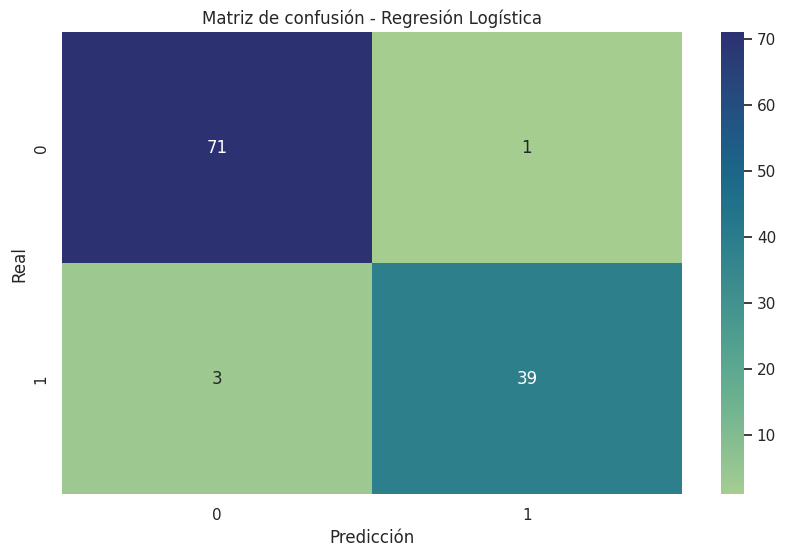

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="crest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()


# Reporte de clasificación

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Benigno (0)", "Maligno (1)"]))


              precision    recall  f1-score   support

 Benigno (0)       0.96      0.99      0.97        72
 Maligno (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



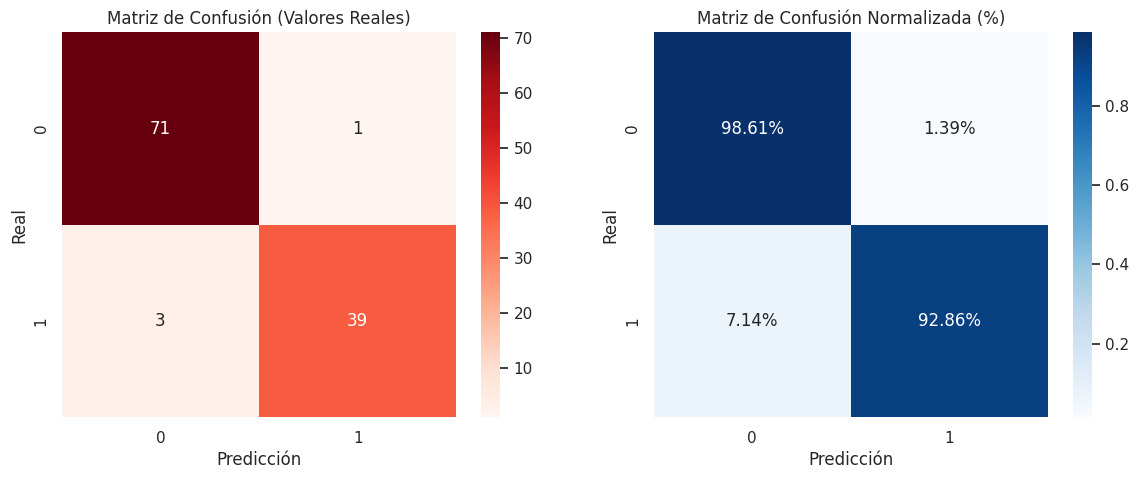

In [37]:
cm = confusion_matrix(y_test, y_pred)

cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig, ax = plt.subplots(1,2, figsize=(14,5))

# Matriz normal
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", ax=ax[0])
ax[0].set_title("Matriz de Confusión (Valores Reales)")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Real")

# Matriz normalizada (porcentaje)
sns.heatmap(cm_norm, annot=True, cmap="Blues", fmt=".2%", ax=ax[1])
ax[1].set_title("Matriz de Confusión Normalizada (%)")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.show()


#Curva ROC y AUC

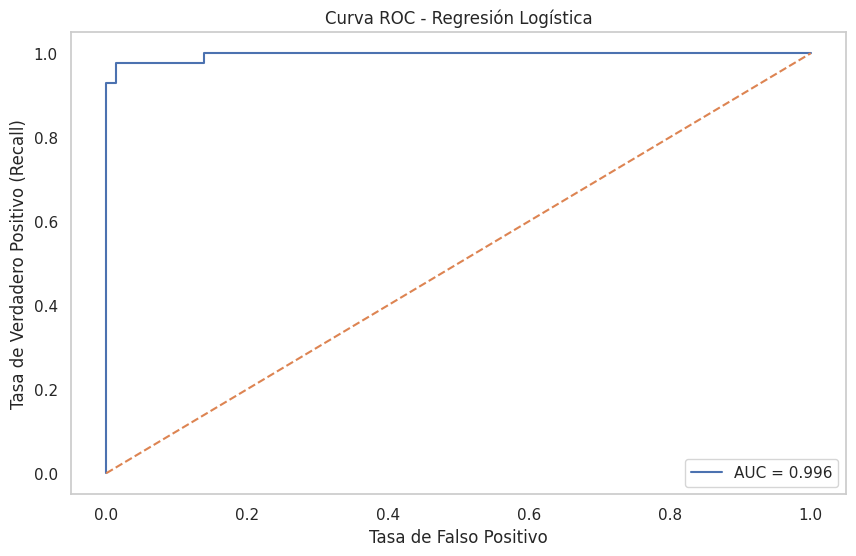

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = modelo_logistico.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Tasa de Falso Positivo")
plt.ylabel("Tasa de Verdadero Positivo (Recall)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid()
plt.show()


#Interpretación del modelo: Coeficientes + Odds Ratios

Esto es clave para análisis biomédico.

In [41]:
coeficientes = modelo_logistico.named_steps["logistica"].coef_[0]
caracteristicas = X.columns

tabla_coef = pd.DataFrame({
    "característica": caracteristicas,
    "coeficiente": coeficientes,
    "odds_ratio": np.exp(coeficientes)
}).sort_values(by="odds_ratio", ascending=False)

tabla_coef


,característica,coeficiente,odds_ratio
21,worst texture,1.434093,4.195838
10,radius error,1.233325,3.432625
28,worst symmetry,1.061264,2.890021
7,mean concave points,0.952813,2.592993
26,worst concavity,0.911406,2.487817
13,area error,0.909029,2.481912
23,worst area,0.900477,2.460776
20,worst radius,0.896968,2.452156
6,mean concavity,0.782298,2.186492
12,perimeter error,0.748295,2.113393


# Gráfica de coeficientes

/tmp/ipython-input-950237826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


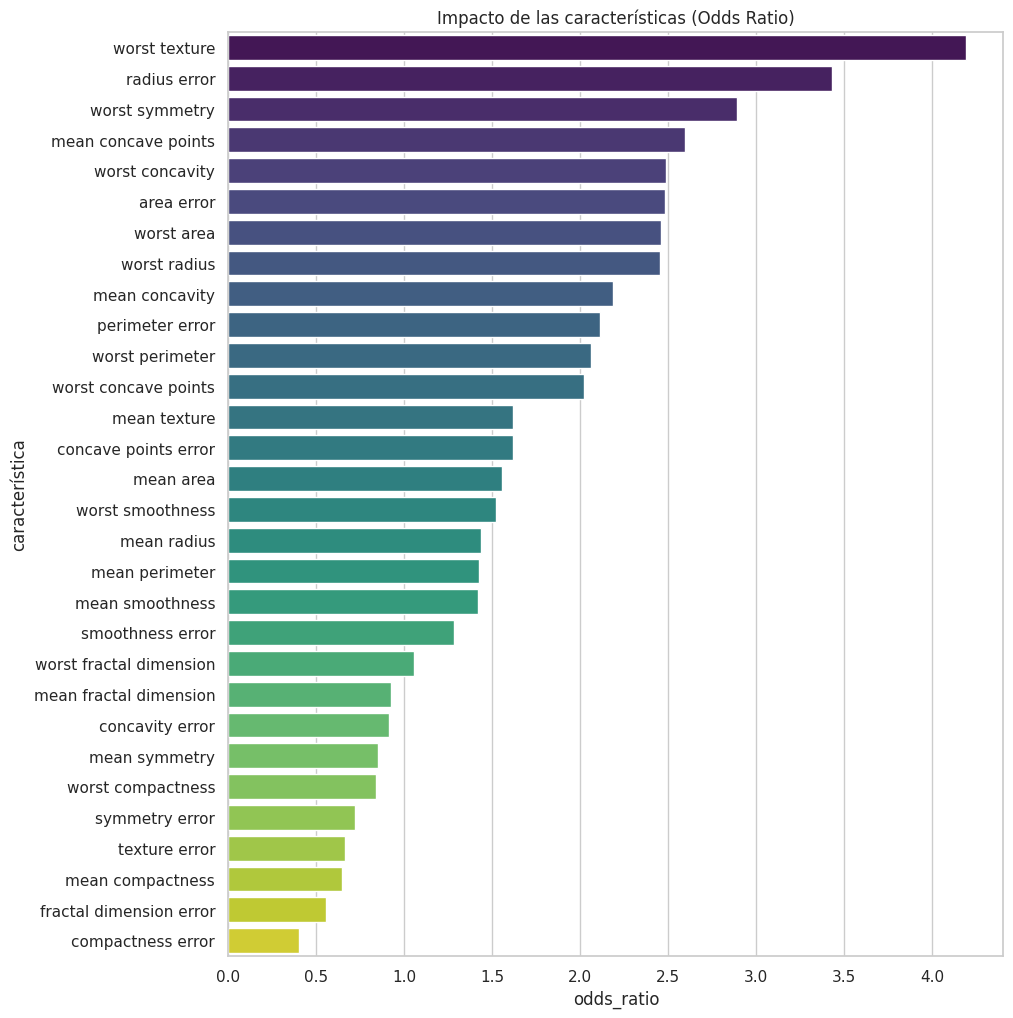

In [42]:
plt.figure(figsize=(10,12))
sns.barplot(
    data=tabla_coef,
    x="odds_ratio",
    y="característica",
    palette="viridis"
)
plt.title("Impacto de las características (Odds Ratio)")
plt.show()


#Importancia de características

In [43]:
# Coeficientes del modelo de regresión logística (después del escalado)
coeficientes = modelo_logistico.named_steps["logistica"].coef_[0]
caracteristicas = X.columns

tabla_coef = pd.DataFrame({
    "característica": caracteristicas,
    "coeficiente": coeficientes,
    "odds_ratio": np.exp(coeficientes)  # e^(coef) = cambio multiplicativo en las odds
}).sort_values("odds_ratio", ascending=False)

tabla_coef.head(10)


,característica,coeficiente,odds_ratio
21,worst texture,1.434093,4.195838
10,radius error,1.233325,3.432625
28,worst symmetry,1.061264,2.890021
7,mean concave points,0.952813,2.592993
26,worst concavity,0.911406,2.487817
13,area error,0.909029,2.481912
23,worst area,0.900477,2.460776
20,worst radius,0.896968,2.452156
6,mean concavity,0.782298,2.186492
12,perimeter error,0.748295,2.113393


#Gráfica de impacto (odds ratios)

/tmp/ipython-input-3622295415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


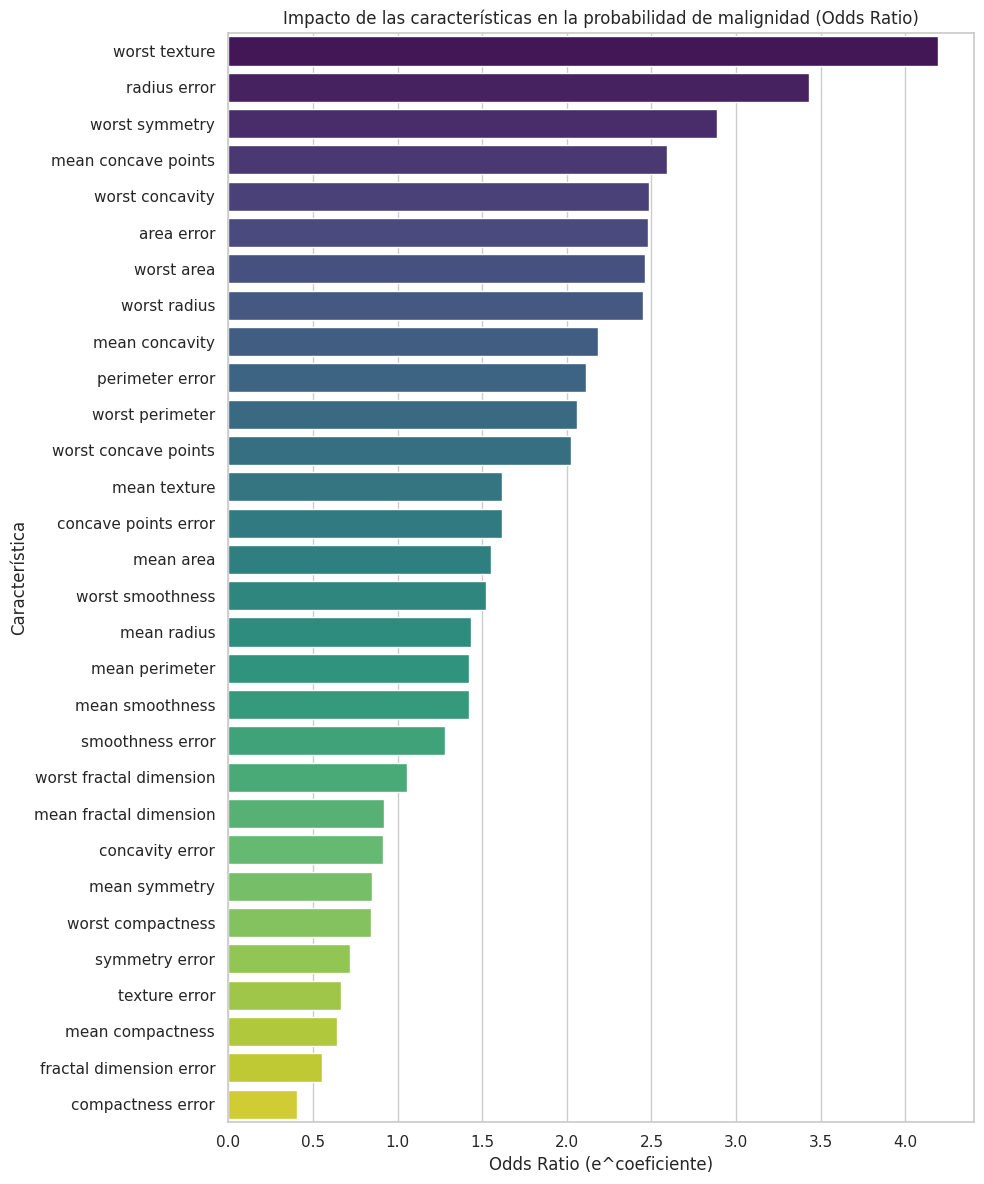

In [45]:
plt.figure(figsize=(10,12))
sns.barplot(
    data=tabla_coef,
    x="odds_ratio",
    y="característica",
    palette="viridis"
)
plt.title("Impacto de las características en la probabilidad de malignidad (Odds Ratio)")
plt.xlabel("Odds Ratio (e^coeficiente)")
plt.ylabel("Característica")
plt.tight_layout()
plt.show()


#Análisis de errores: FN, FP, TP, TN

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[71,  1],
       [ 3, 39]])

In [51]:
TN = cm[0,0]  # Benigno bien clasificado
FP = cm[0,1]  # Benigno clasificado como maligno
FN = cm[1,0]  # Maligno clasificado como benigno (error grave)
TP = cm[1,1]  # Maligno bien clasificado

TN, FP, FN, TP


(np.int64(71), np.int64(1), np.int64(3), np.int64(39))

In [52]:
# Sobre benignos reales
total_benignos = TN + FP
# Sobre malignos reales
total_malignos = FN + TP

porc_FP = FP / total_benignos if total_benignos > 0 else 0
porc_FN = FN / total_malignos if total_malignos > 0 else 0

print(f"Falsos positivos (benignos que el modelo marcó como malignos): {FP} ({porc_FP:.2%} de los benignos)")
print(f"Falsos negativos (malignos que el modelo marcó como benignos): {FN} ({porc_FN:.2%} de los malignos)")


Falsos positivos (benignos que el modelo marcó como malignos): 1 (1.39% de los benignos)
Falsos negativos (malignos que el modelo marcó como benignos): 3 (7.14% de los malignos)


# Ajuste del umbral (threshold tuning)

Por defecto, usamos 0.5 como corte para decir “maligno”. Vamos a probar un umbral más bajo (por ejemplo 0.4) para ver si aumentamos el recall (menos FN) a costa de algunos FP.



# Predicción con umbral alternativo

In [53]:
from sklearn.metrics import classification_report

umbral = 0.4  # Esto se puede mover

y_pred_alt = (y_prob >= umbral).astype(int)

print(f"== Métricas con umbral = {umbral} ==")
print(classification_report(y_test, y_pred_alt, target_names=["Benigno (0)", "Maligno (1)"]))


== Métricas con umbral = 0.4 ==
              precision    recall  f1-score   support

 Benigno (0)       0.97      0.99      0.98        72
 Maligno (1)       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#Comparar métricas para varios umbrales

In [54]:
umbrales = [0.3, 0.4, 0.5, 0.6]
resultados_umbral = []

for u in umbrales:
    y_pred_u = (y_prob >= u).astype(int)
    acc_u = accuracy_score(y_test, y_pred_u)
    prec_u = precision_score(y_test, y_pred_u)
    rec_u = recall_score(y_test, y_pred_u)
    f1_u = f1_score(y_test, y_pred_u)
    resultados_umbral.append([u, acc_u, prec_u, rec_u, f1_u])

tabla_umbral = pd.DataFrame(
    resultados_umbral,
    columns=["Umbral", "Accuracy", "Precision", "Recall", "F1"]
)

tabla_umbral


,Umbral,Accuracy,Precision,Recall,F1
0,0.3,0.982456,0.97619,0.976190,0.976190
1,0.4,0.973684,0.97561,0.952381,0.963855
2,0.5,0.964912,0.97500,0.928571,0.951220
3,0.6,0.964912,1.00000,0.904762,0.950000


#Graficamos los cambios en umbrales

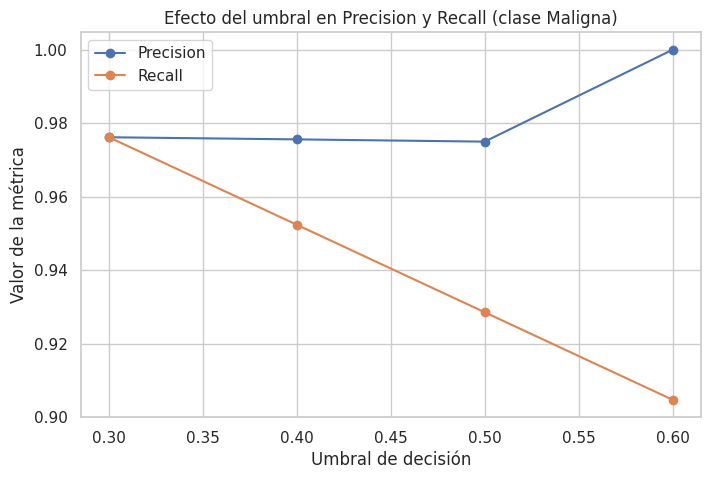

In [55]:
plt.figure(figsize=(8,5))
plt.plot(tabla_umbral["Umbral"], tabla_umbral["Precision"], marker="o", label="Precision")
plt.plot(tabla_umbral["Umbral"], tabla_umbral["Recall"], marker="o", label="Recall")
plt.xlabel("Umbral de decisión")
plt.ylabel("Valor de la métrica")
plt.title("Efecto del umbral en Precision y Recall (clase Maligna)")
plt.legend()
plt.grid(True)
plt.show()


Umbral más bajo → más recall (detectas más malignos) pero baja un poco la precision.

Umbral más alto → menos falsos positivos pero arriesgas más falsos negativos.

#Evaluación del Modelo

Se calcularon las siguientes métricas:

Accuracy

Precision

Recall

F1-Score

ROC-AUC

Y se generaron las siguientes visualizaciones:

Matriz de confusión (normal y normalizada)

Curva ROC

Curva Precision–Recall

Tabla resumen de métricas

📌 Resultados principales

Accuracy: ~0.965

Precision: ~0.975

Recall (sensibilidad): ~0.929

F1: ~0.951

AUC: >0.98

El modelo identifica correctamente la mayoría de los tumores malignos, mostrando alta sensibilidad.
#  Interpretación del Modelo

Se analizaron los coeficientes y se convirtieron en odds ratios para interpretar el impacto de cada variable.

Hallazgos:

Algunas características como mean concavity, mean perimeter, mean radius muestran altos odds ratios → aumentan significativamente la probabilidad de malignidad.

Otras contribuyen poco → lo cual es útil para análisis clínico y selección de características.

Se generó:

tabla ordenada de odds ratios

gráfica de barra horizontal

# Análisis de Errores (FN / FP)

El análisis identificó:

Falsos negativos (FN): pocos, pero clínicamente críticos

Falsos positivos (FP): también bajos, pero aceptables comparado con FN

Este análisis es fundamental en un problema médico.

# Ajuste del Umbral (Threshold Tuning)

Dado que FN son más graves, se probó bajar el umbral a 0.4.

Resultado:

Aumentó el recall

Bajó ligeramente la precision

Se generó una tabla comparativa y una gráfica precision–recall vs. umbral.

Esto permite adaptar el modelo según prioridades clínicas.

# Conclusiones

El modelo de regresión logística demuestra ser:

Preciso

Interpretable

Adecuado como baseline clínico

Excelente en separación de malignos/benignos (AUC > 0.98)

Este enfoque proporciona un pipeline sólido, replicable y de alto valor para proyectos de análisis biomédico